In [64]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [72]:
def F(x):
    return (np.array([x[0]**2 + x[1]**2 + 5*x[0], 
                     2*x[0]*x[1] + 3*x[1]**2 + x[1]]),
            np.array([[2*x[0]+5,  2*x[1]],
                      [2*x[1],    2*x[0]+6*x[1]+1]]))

In [86]:
def newton(x0, F, it=50):
    points = np.zeros((it, len(x0)))
    points[0] = x0
    x = x0
    for i in range(1, it):
        f, grad = F(x)
        h = scipy.linalg.solve(grad, -f)
        x += h
        points[i] = x
    return points

def fpi(x0, F, alpha, it=50):
    points = np.zeros((it, len(x0)))
    points[0] = x0
    x = x0
    for i in range(1, it):
        f, _ = F(x)
        x = x - alpha*f
        points[i] = x
    return points

In [89]:
newton_pts = newton(np.array([0.1,0.1]), F, 50)
fpi_pts = fpi(np.array([0.1,0.1]), F, 0.1, 50)

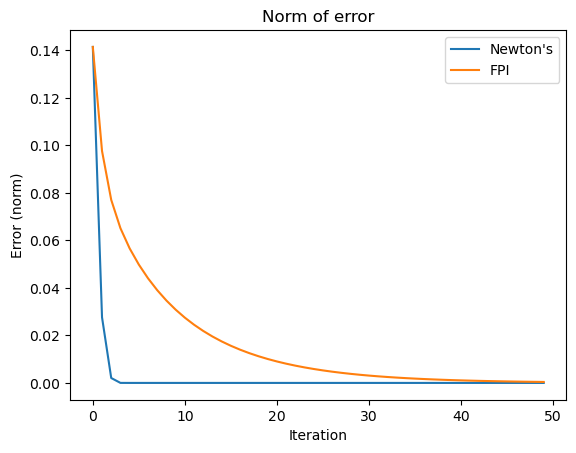

In [90]:
fig, ax = plt.subplots()
ax.set_title('Norm of error')
ax.set_xlabel("Iteration")
ax.set_ylabel("Error (norm)")
ax.plot(np.arange(0,len(newton_pts)), np.linalg.norm(newton_pts,axis=1), label="Newton's")
ax.plot(np.arange(0,len(fpi_pts)), np.linalg.norm(fpi_pts,axis=1), label="FPI")
plt.legend()

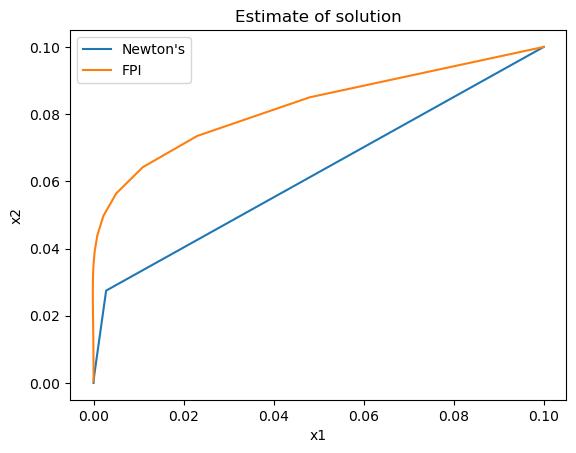

In [93]:
fig, ax = plt.subplots()
ax.set_title('Estimate of solution')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.plot(newton_pts[:,0], newton_pts[:,1], label="Newton's")
ax.plot(fpi_pts[:,0], fpi_pts[:,1], label="FPI")
plt.legend()